<br><br><center><h1 style="font-size:4em;color:#2467C0">Mini Project: Soccer Data Analysis</h1></center>
<br>

#### For this mini project I am using __[The ultimate Soccer database](https://www.kaggle.com/hugomathien/soccer/home)__ from the coding ground for Data science __[Kaggle](https://www.kaggle.com/)__

- All the details about dataset -<br>
- +25,000 matches<br>
- +10,000 players<br>
- 11 European Countries with their lead championship<br>
- Seasons 2008 to 2016<br>
- Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates<br>
- Team line up with squad formation (X, Y coordinates)<br>
- Betting odds from up to 10 providers<br>
- Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10,000 matches<br>

### Problem Statement:
## <center><font color=green>Find 10 most Important Skills/feature that contribute to the overall rating of the Player ?</font></center>

### Importing Libraries

In [1]:
import sqlite3 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Dataset
Our data is in the form of SQL database. We need to extract the required data from SQLite Database. For this we are using sqlite package from python

In [14]:
c = sqlite3.connect('database.sqlite')
data = pd.read_sql_query("SELECT * FROM Player_Attributes",c)

### Exploring Dataset

Now lets explore our data.<br>
Lets get some basic information about data

In [3]:
# Checking first five columns of the dataset
data.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [4]:
# Total No of Columns
data.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [5]:
len(data.columns)

42

Our dataset has 42 columns.<br>
lets check the desciption of all numerical values in the dataset

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,183978.0,91989.500000,53110.018250,1.0,45995.25,91989.5,137983.75,183978.0
player_fifa_api_id,183978.0,165671.524291,53851.094769,2.0,155798.00,183488.0,199848.00,234141.0
player_api_id,183978.0,135900.617324,136927.840510,2625.0,34763.00,77741.0,191080.00,750584.0
overall_rating,183142.0,68.600015,7.041139,33.0,64.00,69.0,73.00,94.0
potential,183142.0,73.460353,6.592271,39.0,69.00,74.0,78.00,97.0
crossing,183142.0,55.086883,17.242135,1.0,45.00,59.0,68.00,95.0
finishing,183142.0,49.921078,19.038705,1.0,34.00,53.0,65.00,97.0
heading_accuracy,183142.0,57.266023,16.488905,1.0,49.00,60.0,68.00,98.0
short_passing,183142.0,62.429672,14.194068,3.0,57.00,65.0,72.00,97.0
volleys,181265.0,49.468436,18.256618,1.0,35.00,52.0,64.00,93.0


In [8]:
# Check for the NULL values in the dataset
data.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

- As we can see only 4 columns in the dataset don't have NULL values

### Deleting NULL records from the dataset

In [15]:
# Number of rows before deleting 
original_rows = data.shape[0]
print("Number of rows befor deletion: {}".format(original_rows))

# Deleting rows with NULL values
data = data.dropna()

#Number of rows after deletion
new_rows = data.shape[0]
print("Number of rows befor deletion: {}".format(new_rows))


Number of rows befor deletion: 183978
Number of rows befor deletion: 180354


In [30]:
data.dtypes

id                       int64
player_fifa_api_id       int64
player_api_id            int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
interceptions          float64
positioning            float64
vision  

- Only four feaures are categorical features
- We will try to convert them into numerical values

In [37]:
object_dtype = list(data.select_dtypes(include=['object']).columns)

In [49]:
print(object_dtype)

['date', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate']


In [19]:
# Lets try to check correlation between different features
corr_data = data.corr()

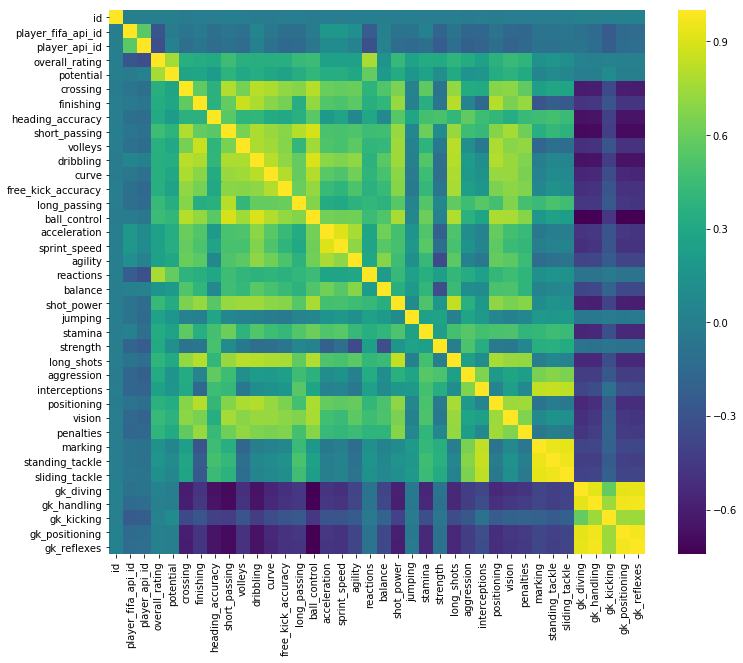

In [67]:
# Plotting these values using seaborns Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_data,cmap='viridis')
plt.savefig('Heatmap_all.png',dpi=300)

<Figure size 864x864 with 0 Axes>

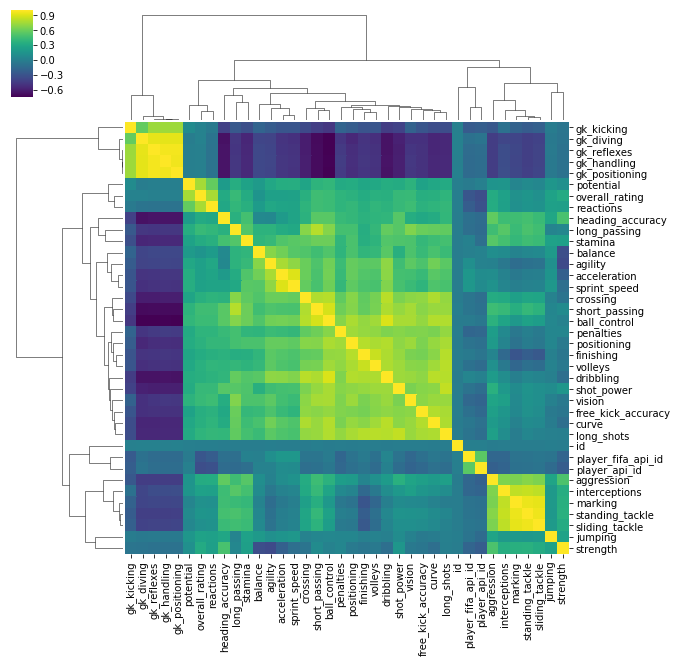

In [64]:
plt.figure(figsize=(12,12))
sns.clustermap(corr_data,cmap='viridis')
plt.savefig('clustermap',dpi=100)

- From this Clustermap we can the clustering of different features which are highly correlated to each other
- Now we want to check the correlation of these features with Overall Rating of the player

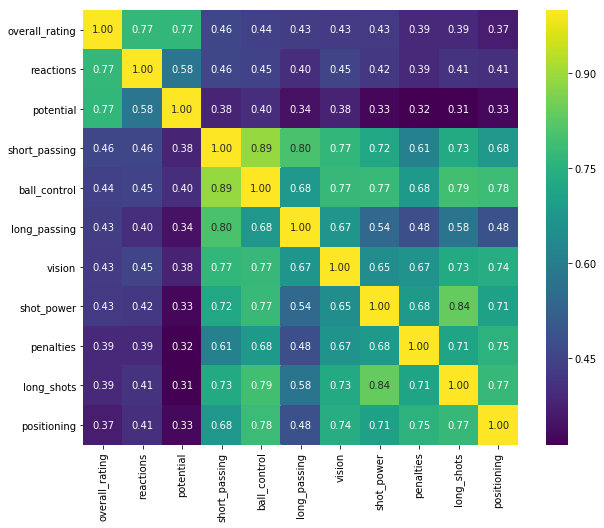

In [65]:
#Extracting Highly Related features to Overall Rating
cols = corr_data.nlargest(11,columns='overall_rating')['overall_rating'].index
corr_matrix2 = np.corrcoef(data[cols].values.T)
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix2, cbar=True,cmap='viridis', annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.savefig('final_heatmap.jpeg',dpi=100)

<br><br><center><h4 style="font-size:3em;color:#800000">Outcome</h4></center>
<br>


<center><h2 style = "font-size:2em;color:#397fef">Top 10 Features that are contributing to the Overall Rating of the Player</h2></center>

<left> <h4 style ="font-size:1.3em" >1. reactions<br>
2. potential<br>
3. short_passing<br>
4. ball_control<br>
5. long_passing<br>
6. vision<br>
7. shot_power<br>
8. penalties<br>
9. long_shots<br>
10. positioning</h4></left>